# ANN-BS-HW04

Take 1000 images from CIFAR10. Then, given a pair of images from CIFAR10 𝑥1 and 𝑥2, build a
network that can return both images given their average as the only input. 

# Outline
- [Packages ](#1)
- [Loading Data ](#2)
- [Building inputs](#3)
- [Modeling](#3)
  - [Autoencoder](#3.1)
- [Evaluating](#4)


<a name="1"></a>
## **Packages** 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization,Dropout,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers import AveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from keras.utils import plot_model
import random
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

<a name="2"></a>
##  **Loading Data** 


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
labels = ["airplane"
,"automobile"
, "bird" 
, "cat" 
,"deer" 
,"dog" 
,"frog" 
,"horse" 
,"ship" 
,"truck"]

automobile


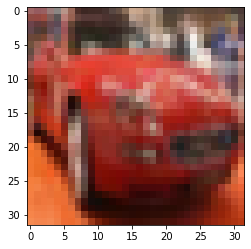

In [4]:
plt.imshow(x_train[5])
print(labels[int(y_train[5])])

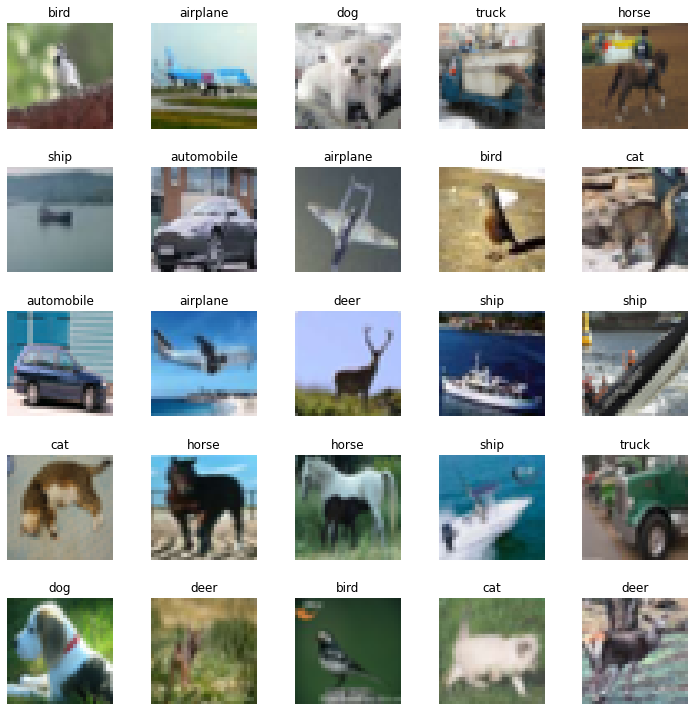

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
X = x_train
fig, axes = plt.subplots(5,5, figsize=(10,10))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(50000)
    ax.imshow(X[random_index], cmap='gray')
    ax.set_title(labels[int(y_train[random_index])])
    ax.set_axis_off()

In [6]:
x_train.shape

(50000, 32, 32, 3)

<a name="3"></a>
# Building inputs

In [7]:
meanTrainingsetLabel = np.array([])
meanTrainingset = np.array([])

imageset1 for x1 / imageset2 for x2

In [8]:
imageset1 =  np.array([])
imageset2 =  np.array([])

Split data in two half and choose x1 from first one and x2 from second one

And normalize data

In [11]:
x_train = x_train/255

In [12]:
for i in range(1000):
    x1 = random.randint(0, 25000)
    x2 = random.randint(25000,50000)
    imageset1 = np.append(imageset1,x_train[x1])
    imageset2 = np.append(imageset2,x_train[x2])
    x3 = (x_train[x1] + x_train[x2])/2
    x3Label =labels[int(y_train[x1])]+"." +labels[int(y_train[x2])]
    meanTrainingsetLabel = np.append(meanTrainingsetLabel, x3Label)
    meanTrainingset = np.append(meanTrainingset, x3)

In [13]:
meanTrainingsetLabel[5]

'airplane.ship'

In [14]:
meanTrainingset = meanTrainingset.reshape(1000,32,32,3)

Our input is ready

In [15]:
meanTrainingset.shape

(1000, 32, 32, 3)

In [16]:
imageset1.shape

(3072000,)

In [17]:
imageset1 = imageset1.reshape(1000,32,32,3)

In [18]:
imageset2 = imageset2.reshape(1000 ,32,32,3)

In [19]:
imageset2.shape

(1000, 32, 32, 3)

In [20]:
meanTrainingset[2].shape

(32, 32, 3)


<a name="3"></a>
##  **Modeling** 

I'm going to use Normal Autoencoder with two decoders to fit with the x1 and x2 dataset

<a name="3.1"></a>

# Autoencoder

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

In [22]:
latent_dim = 64
class AutoencoderWithoutNorm1(Model):
    def __init__(self, latent_dim):
        super(AutoencoderWithoutNorm1, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Input(shape=(32, 32, 3)),
              layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
              layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
        
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])
        self.decoderTwo = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2

autoencoderWithoutNorm1 = AutoencoderWithoutNorm1(latent_dim)

In [23]:
autoencoderWithoutNorm1.compile(optimizer='adam', metrics=["accuracy"], loss=losses.MeanSquaredError())

In [25]:
autoencoderWithoutNorm1.fit(meanTrainingset,[imageset1,imageset2],epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 32ms/step - loss: 0.0667 - output_1_loss: 0.0334 - output_2_loss: 0.0333 - output_1_accuracy: 0.5766 - output_2_accuracy: 0.5713
Epoch 2/50
32/32 [==============================] - 1s 36ms/step - loss: 0.0668 - output_1_loss: 0.0334 - output_2_loss: 0.0334 - output_1_accuracy: 0.5771 - output_2_accuracy: 0.5734
Epoch 3/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0669 - output_1_loss: 0.0335 - output_2_loss: 0.0334 - output_1_accuracy: 0.5731 - output_2_accuracy: 0.5749
Epoch 4/50
32/32 [==============================] - 1s 36ms/step - loss: 0.0670 - output_1_loss: 0.0336 - output_2_loss: 0.0334 - output_1_accuracy: 0.5724 - output_2_accuracy: 0.5741
Epoch 5/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0668 - output_1_loss: 0.0335 - output_2_loss: 0.0333 - output_1_accuracy: 0.5752 - output_2_accuracy: 0.5729
Epoch 6/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0678 

32/32 [==============================] - 1s 43ms/step - loss: 0.0671 - output_1_loss: 0.0335 - output_2_loss: 0.0336 - output_1_accuracy: 0.5760 - output_2_accuracy: 0.5769
Epoch 46/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0665 - output_1_loss: 0.0332 - output_2_loss: 0.0333 - output_1_accuracy: 0.5768 - output_2_accuracy: 0.5714
Epoch 47/50
32/32 [==============================] - 1s 42ms/step - loss: 0.0665 - output_1_loss: 0.0333 - output_2_loss: 0.0333 - output_1_accuracy: 0.5749 - output_2_accuracy: 0.5759
Epoch 48/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0666 - output_1_loss: 0.0333 - output_2_loss: 0.0332 - output_1_accuracy: 0.5700 - output_2_accuracy: 0.5733
Epoch 49/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0663 - output_1_loss: 0.0332 - output_2_loss: 0.0331 - output_1_accuracy: 0.5797 - output_2_accuracy: 0.5742
Epoch 50/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0664 - outp

loss: 0.0664 - output_1_loss: 0.0333 - output_2_loss: 0.0332 - output_1_accuracy: 0.5739 - output_2_accuracy: 0.5746

In [29]:
latent_dim = 64
class Autoencoder2(Model):
    def __init__(self, latent_dim):
        super(Autoencoder2, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Flatten(),
              layers.Dense(latent_dim, activation='relu'),
              layers.Dense(32, activation='relu'),
              layers.Dense(16, activation='relu'),


        
        ])
        self.decoderOne = tf.keras.Sequential([
            
            layers.Dense(3072, activation='softmax'),
            layers.Reshape((32, 32,3)),
            
        ])
        self.decoderTwo = tf.keras.Sequential([
             layers.Dense(3072, activation='softmax'),
             layers.Reshape((32, 32,3)),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2

autoencoder2 = Autoencoder2(latent_dim)

In [30]:
autoencoder2.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [31]:
autoencoder2.fit(meanTrainingset,[imageset1,imageset2],epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.3326 - output_2_accuracy: 0.3374
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.3331 - output_2_accuracy: 0.3405
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.3362 - output_2_accuracy: 0.3417
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2844 - output_1_accuracy: 0.3473 - output_2_accuracy: 0.3457
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5749 - output_1_loss: 0.2905 - output_2_loss: 0.2844 - output_1_accuracy: 0.3772 - output_2_accuracy: 0.3712
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5749 - outp

32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4282 - output_2_accuracy: 0.4300
Epoch 46/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4283 - output_2_accuracy: 0.4299
Epoch 47/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4277 - output_2_accuracy: 0.4297
Epoch 48/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4274 - output_2_accuracy: 0.4296
Epoch 49/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4264 - output_2_accuracy: 0.4289
Epoch 50/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5747 - output_1_l

Autoencoder 2 : loss: 0.5747 - output_1_loss: 0.2904 - output_2_loss: 0.2843 - output_1_accuracy: 0.4265 - output_2_accuracy: 0.4290

In [37]:
latent_dim = 64
class Autoencoder2_1(Model):
    def __init__(self, latent_dim):
        super(Autoencoder2_1, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Flatten(),
              layers.Dense(latent_dim, activation='relu'),
              layers.Dense(32, activation='relu'),
              layers.Dense(16, activation='relu'),


        
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.Dense(512,activation='relu'),
             layers.Dense(10, activation='relu'),
             layers.Dense(3072, activation='softmax'),
             
             layers.Reshape((32, 32,3)),
            
        ])
        self.decoderTwo = tf.keras.Sequential([
             layers.Dense(512,activation='relu'),
             layers.Dense(10, activation='relu'),
             layers.Dense(3072, activation='softmax'),
             layers.Reshape((32, 32,3)),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2

autoencoder2_1 = Autoencoder2_1(latent_dim)

In [38]:
autoencoder2_1.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [39]:
autoencoder2_1.fit(meanTrainingset,[imageset1,imageset2],epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.3423 - output_2_accuracy: 0.3385
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.3709 - output_2_accuracy: 0.3572
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.4053 - output_2_accuracy: 0.3805
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.4311 - output_2_accuracy: 0.4011
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - output_1_loss: 0.2905 - output_2_loss: 0.2845 - output_1_accuracy: 0.4463 - output_2_accuracy: 0.4139
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5750 - outp

32/32 [==============================] - 0s 4ms/step - loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4822 - output_2_accuracy: 0.4751
Epoch 46/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4849 - output_2_accuracy: 0.4768
Epoch 47/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4845 - output_2_accuracy: 0.4772
Epoch 48/50
32/32 [==============================] - 0s 5ms/step - loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4841 - output_2_accuracy: 0.4775
Epoch 49/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4819 - output_2_accuracy: 0.4778
Epoch 50/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5748 - output_1_l

Autoencoder 2_1 :  loss: 0.5748 - output_1_loss: 0.2904 - output_2_loss: 0.2844 - output_1_accuracy: 0.4857 - output_2_accuracy: 0.4782.4290

latent_dim = 32

In [40]:
latent_dim = 32
class Autoencoder32(Model):
    def __init__(self, latent_dim):
        super(Autoencoder32, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Input(shape=(32, 32, 3)),
              layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
              layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
        
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])
        self.decoderTwo = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2

autoencoder32 = Autoencoder32(latent_dim)

In [41]:
autoencoder32.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [43]:
autoencoder32.fit(meanTrainingset,[imageset1,imageset2],epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 34ms/step - loss: 0.0795 - output_1_loss: 0.0401 - output_2_loss: 0.0394 - output_1_accuracy: 0.4690 - output_2_accuracy: 0.4653
Epoch 2/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0781 - output_1_loss: 0.0392 - output_2_loss: 0.0389 - output_1_accuracy: 0.4665 - output_2_accuracy: 0.4787
Epoch 3/50
32/32 [==============================] - 1s 34ms/step - loss: 0.0776 - output_1_loss: 0.0388 - output_2_loss: 0.0388 - output_1_accuracy: 0.4679 - output_2_accuracy: 0.4692
Epoch 4/50
32/32 [==============================] - 1s 36ms/step - loss: 0.0760 - output_1_loss: 0.0382 - output_2_loss: 0.0378 - output_1_accuracy: 0.4857 - output_2_accuracy: 0.4808
Epoch 5/50
32/32 [==============================] - 1s 36ms/step - loss: 0.0753 - output_1_loss: 0.0377 - output_2_loss: 0.0376 - output_1_accuracy: 0.4883 - output_2_accuracy: 0.4858
Epoch 6/50
32/32 [==============================] - 1s 35ms/step - loss: 0.0750 

32/32 [==============================] - 1s 41ms/step - loss: 0.0685 - output_1_loss: 0.0343 - output_2_loss: 0.0342 - output_1_accuracy: 0.5675 - output_2_accuracy: 0.5593
Epoch 46/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0681 - output_1_loss: 0.0341 - output_2_loss: 0.0340 - output_1_accuracy: 0.5669 - output_2_accuracy: 0.5619
Epoch 47/50
32/32 [==============================] - 1s 42ms/step - loss: 0.0684 - output_1_loss: 0.0342 - output_2_loss: 0.0342 - output_1_accuracy: 0.5642 - output_2_accuracy: 0.5683
Epoch 48/50
32/32 [==============================] - 1s 41ms/step - loss: 0.0681 - output_1_loss: 0.0341 - output_2_loss: 0.0340 - output_1_accuracy: 0.5624 - output_2_accuracy: 0.5649
Epoch 49/50
32/32 [==============================] - 1s 41ms/step - loss: 0.0679 - output_1_loss: 0.0340 - output_2_loss: 0.0339 - output_1_accuracy: 0.5688 - output_2_accuracy: 0.5602
Epoch 50/50
32/32 [==============================] - 1s 42ms/step - loss: 0.0690 - outp

latent_dim = 128

In [92]:
latent_dim = 128
class Autoencoder128(Model):
    def __init__(self, latent_dim):
        super(Autoencoder128, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Flatten(),
              layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.Dense(3072, activation='sigmoid'),
            layers.Reshape((32, 32,3))
        ])
        self.decoderTwo = tf.keras.Sequential([
            layers.Dense(3072, activation='sigmoid'),
            layers.Reshape((32, 32,3))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2


In [96]:
autoencoder128 = Autoencoder128(latent_dim)

In [97]:
autoencoder128.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [99]:
autoencoder128.fit(meanTrainingset,[imageset1,imageset2],epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1116 - output_1_loss: 0.0563 - output_2_loss: 0.0553 - output_1_accuracy: 0.5017 - output_2_accuracy: 0.4641
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1114 - output_1_loss: 0.0562 - output_2_loss: 0.0552 - output_1_accuracy: 0.4969 - output_2_accuracy: 0.4694
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1109 - output_1_loss: 0.0560 - output_2_loss: 0.0549 - output_1_accuracy: 0.4992 - output_2_accuracy: 0.4672
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1109 - output_1_loss: 0.0560 - output_2_loss: 0.0549 - output_1_accuracy: 0.5013 - output_2_accuracy: 0.4603
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1107 - output_1_loss: 0.0558 - output_2_loss: 0.0549 - output_1_accuracy: 0.5039 - output_2_accuracy: 0.4601
Epoch 6/100
32/32 [==============================] - 0s 11ms/step - loss: 0

32/32 [==============================] - 0s 11ms/step - loss: 0.1039 - output_1_loss: 0.0520 - output_2_loss: 0.0518 - output_1_accuracy: 0.4967 - output_2_accuracy: 0.4474
Epoch 90/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1038 - output_1_loss: 0.0521 - output_2_loss: 0.0517 - output_1_accuracy: 0.4850 - output_2_accuracy: 0.4584
Epoch 91/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1038 - output_1_loss: 0.0521 - output_2_loss: 0.0517 - output_1_accuracy: 0.4907 - output_2_accuracy: 0.4503
Epoch 92/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1037 - output_1_loss: 0.0521 - output_2_loss: 0.0516 - output_1_accuracy: 0.4964 - output_2_accuracy: 0.4609
Epoch 93/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1043 - output_1_loss: 0.0523 - output_2_loss: 0.0520 - output_1_accuracy: 0.4942 - output_2_accuracy: 0.4433
Epoch 94/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1039 -

Autoencoder32 : loss: 0.1036 - output_1_loss: 0.0519 - output_2_loss: 0.0517 - output_1_accuracy: 0.4860 - output_2_accuracy: 0.4544

# 

# 

In [56]:
latent_dim = 64
class Autoencoder4(Model):
    def __init__(self, latent_dim):
        super(Autoencoder4, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
              BatchNormalization(),
              layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'),
              layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
              BatchNormalization(),
              
        
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
             BatchNormalization(),
            layers.Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid')
           
        ])
        self.decoderTwo = tf.keras.Sequential([
           layers.UpSampling2D((2, 2)),
            layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
             BatchNormalization(),
            layers.Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        decoded2 = self.decoderTwo(encoded)
        return decoded1,decoded2

autoencoder4= Autoencoder4(latent_dim)

In [57]:
autoencoder4.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [58]:
autoencoder4.fit(meanTrainingset,[imageset1,imageset2],epochs=100)

Epoch 1/100
32/32 [==============================] - 4s 88ms/step - loss: 0.1043 - output_1_loss: 0.0526 - output_2_loss: 0.0517 - output_1_accuracy: 0.4175 - output_2_accuracy: 0.4148
Epoch 2/100
32/32 [==============================] - 3s 90ms/step - loss: 0.0733 - output_1_loss: 0.0367 - output_2_loss: 0.0366 - output_1_accuracy: 0.4889 - output_2_accuracy: 0.5069
Epoch 3/100
32/32 [==============================] - 3s 91ms/step - loss: 0.0695 - output_1_loss: 0.0348 - output_2_loss: 0.0347 - output_1_accuracy: 0.5333 - output_2_accuracy: 0.5338
Epoch 4/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0680 - output_1_loss: 0.0339 - output_2_loss: 0.0341 - output_1_accuracy: 0.5602 - output_2_accuracy: 0.5539
Epoch 5/100
32/32 [==============================] - 4s 121ms/step - loss: 0.0673 - output_1_loss: 0.0336 - output_2_loss: 0.0337 - output_1_accuracy: 0.5701 - output_2_accuracy: 0.5642
Epoch 6/100
32/32 [==============================] - 4s 114ms/step - loss

32/32 [==============================] - 3s 108ms/step - loss: 0.0637 - output_1_loss: 0.0317 - output_2_loss: 0.0321 - output_1_accuracy: 0.6296 - output_2_accuracy: 0.6283
Epoch 45/100
32/32 [==============================] - 3s 107ms/step - loss: 0.0632 - output_1_loss: 0.0316 - output_2_loss: 0.0316 - output_1_accuracy: 0.6344 - output_2_accuracy: 0.6387
Epoch 46/100
32/32 [==============================] - 3s 106ms/step - loss: 0.0633 - output_1_loss: 0.0318 - output_2_loss: 0.0315 - output_1_accuracy: 0.6334 - output_2_accuracy: 0.6335
Epoch 47/100
32/32 [==============================] - 3s 107ms/step - loss: 0.0633 - output_1_loss: 0.0318 - output_2_loss: 0.0315 - output_1_accuracy: 0.6267 - output_2_accuracy: 0.6344
Epoch 48/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0634 - output_1_loss: 0.0318 - output_2_loss: 0.0316 - output_1_accuracy: 0.6322 - output_2_accuracy: 0.6303
Epoch 49/100
32/32 [==============================] - 3s 108ms/step - loss: 0.

32/32 [==============================] - 3s 103ms/step - loss: 0.0621 - output_1_loss: 0.0310 - output_2_loss: 0.0310 - output_1_accuracy: 0.6353 - output_2_accuracy: 0.6380
Epoch 88/100
32/32 [==============================] - 4s 114ms/step - loss: 0.0619 - output_1_loss: 0.0308 - output_2_loss: 0.0310 - output_1_accuracy: 0.6362 - output_2_accuracy: 0.6342
Epoch 89/100
32/32 [==============================] - 4s 115ms/step - loss: 0.0618 - output_1_loss: 0.0308 - output_2_loss: 0.0310 - output_1_accuracy: 0.6295 - output_2_accuracy: 0.6382
Epoch 90/100
32/32 [==============================] - 4s 112ms/step - loss: 0.0622 - output_1_loss: 0.0312 - output_2_loss: 0.0310 - output_1_accuracy: 0.6268 - output_2_accuracy: 0.6339
Epoch 91/100
32/32 [==============================] - 3s 106ms/step - loss: 0.0620 - output_1_loss: 0.0309 - output_2_loss: 0.0311 - output_1_accuracy: 0.6287 - output_2_accuracy: 0.6384
Epoch 92/100
32/32 [==============================] - 3s 108ms/step - loss: 0.

loss: 0.0617 - output_1_loss: 0.0308 - output_2_loss: 0.0309 - output_1_accuracy: 0.6328 - output_2_accuracy: 0.6319

In [82]:
latent_dim = 64
class Autoencoder4_1(Model):
    def __init__(self, latent_dim):
        super(Autoencoder4_1, self).__init__()
        self.latent_dim = latent_dim  
        #Our encoder(using cnn)
        self.encoder = tf.keras.Sequential([
              layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
              BatchNormalization(),
              layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'),
              layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
              BatchNormalization(),
              
        
        ])
        self.decoderOne = tf.keras.Sequential([
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
             BatchNormalization(),
            layers.Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid')
           
        ])


    def call(self, x):
        encoded = self.encoder(x)
        decoded1 = self.decoderOne(encoded)
        return decoded1

autoencoder4_1= Autoencoder4_1(latent_dim)

In [83]:
autoencoder4_1.compile(optimizer='adam',metrics=["accuracy"], loss=losses.MeanSquaredError())

In [84]:
autoencoder4_1.fit(meanTrainingset,imageset1,epochs=50)

Epoch 1/50
32/32 [==============================] - 3s 61ms/step - loss: 0.0483 - accuracy: 0.4182
Epoch 2/50
32/32 [==============================] - 2s 61ms/step - loss: 0.0358 - accuracy: 0.5007
Epoch 3/50
32/32 [==============================] - 2s 62ms/step - loss: 0.0343 - accuracy: 0.5464
Epoch 4/50
32/32 [==============================] - 2s 64ms/step - loss: 0.0336 - accuracy: 0.5678
Epoch 5/50
32/32 [==============================] - 2s 63ms/step - loss: 0.0336 - accuracy: 0.5725
Epoch 6/50
32/32 [==============================] - 2s 65ms/step - loss: 0.0334 - accuracy: 0.5817
Epoch 7/50
32/32 [==============================] - 2s 62ms/step - loss: 0.0332 - accuracy: 0.5898
Epoch 8/50
32/32 [==============================] - 2s 62ms/step - loss: 0.0330 - accuracy: 0.5860
Epoch 9/50
32/32 [==============================] - 2s 61ms/step - loss: 0.0327 - accuracy: 0.5980
Epoch 10/50
32/32 [==============================] - 2s 61ms/step - loss: 0.0327 - accuracy: 0.5972
Epoch 11/

<a name="4"></a>
# Testing dataset

In [60]:
imageset1Test =  np.array([])
imageset2Test =  np.array([])
meanTrainingsetLabelTest = np.array([])
meanTrainingsetTest = np.array([])

In [61]:
for i in range(500):
    x1 = random.randint(0, 25000)
    x2 = random.randint(25000,50000)
    imageset1Test = np.append(imageset1Test,x_train[x1])
    imageset2Test = np.append(imageset2Test,x_train[x2])
    x3 = (x_train[x1] + x_train[x2])/2
    x3Label =labels[int(y_train[x1])]+"." +labels[int(y_train[x2])]
    meanTrainingsetLabelTest = np.append(meanTrainingsetLabelTest, x3Label)
    meanTrainingsetTest = np.append(meanTrainingsetTest, x3)

In [62]:
meanTrainingsetTest = meanTrainingsetTest.reshape(500,32,32,3)
imageset1Test = imageset1Test.reshape(500,32,32,3)
imageset2Test = imageset2Test.reshape(500,32,32,3)

In [63]:
encoded_imgs  = autoencoder4.encoder(meanTrainingsetTest).numpy()
decoded_imgs1 = autoencoder4.decoderOne(encoded_imgs).numpy()
decoded_imgs2 = autoencoder4.decoderTwo(encoded_imgs).numpy()

In [64]:
decoded_imgs1.shape

(500, 32, 32, 3)

cat


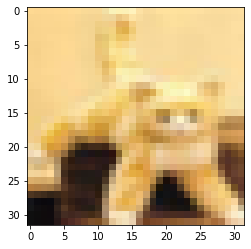

In [72]:
plt.imshow(imageset1Test[1])
print("cat")

frog


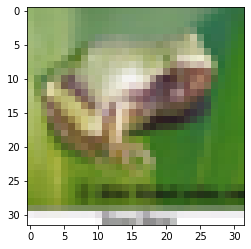

In [73]:
plt.imshow(imageset2Test[1])
print("frog")

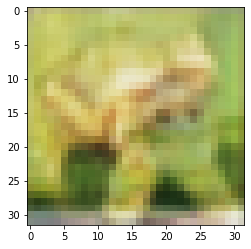

In [75]:
plt.imshow(decoded_imgs1[1])


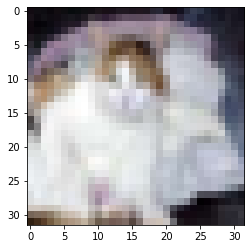

In [78]:
plt.imshow(imageset1Test[50])

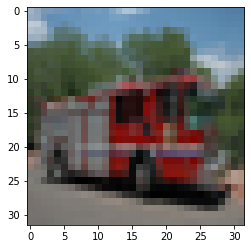

In [79]:
plt.imshow(imageset2Test[50])

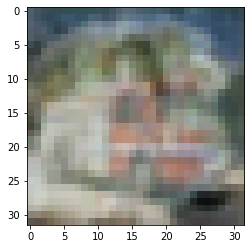

In [80]:
plt.imshow(decoded_imgs1[50])

In [85]:
encoded_imgs_41  = autoencoder4_1.encoder(meanTrainingsetTest).numpy()
decoded_imgs1_41 = autoencoder4_1.decoderOne(encoded_imgs).numpy()

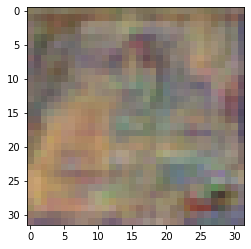

In [86]:
plt.imshow(decoded_imgs1_41[50])